In [3]:
import numpy as np
import random as rnd

# (x_init, y_init) is the lowest left point of the rectangle
x_init = np.zeros(50)
y_init = np.zeros(50)
x_len = np.zeros(50)
y_len = np.zeros(50)

for i in range(50):
    x_init[i] = rnd.uniform(1, 50) 
    y_init[i] = rnd.uniform(1, 50) 
    x_len = rnd.uniform(1, 50) 
    y_len = rnd.uniform(1, 50)
print x_init

[ 37.01524035  33.46451153  34.83806595  15.88849513  12.75823978
  18.40565951  22.20122974  45.65101138  13.51325457  16.82513026
  11.30232029  39.03860644  34.03069686  23.9228803   46.05478698
  10.331149    26.95585316  14.31982467   4.95541692  29.09983886
  10.09412011  28.11019699  12.61256404  14.75501826  34.73712476
  12.89776299  48.00727563  29.22526753  43.69462126  12.15778044
  46.82361406  21.77041623   6.69328601  33.78656142  47.72446706
   5.66987599  31.26577001   6.62076789   5.3446797   26.48590376
  43.99998272  25.39011293  30.78802268  27.91513588  28.40300068
  47.9228882   35.38534017  41.26249007  32.5568189    7.6961414 ]


In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def generate_rect():
    r = np.random.rand(1, 4)[0]*100
    #print r
    return np.min(r[0:2]), np.max(r[0:2]), np.min(r[2:]), np.max(r[2:])

def draw_sample_from_rect(rect):
    return (np.random.rand()*(rect[1]-rect[0])+rect[0], np.random.rand()*(rect[3]-rect[2])+rect[2]) 


def learn_rect(samples):
    a = np.min([s[0] for s in samples])
    b = np.max([s[0] for s in samples])
    c = np.min([s[1] for s in samples])
    d = np.max([s[1] for s in samples])
    return a,b,c,d

def correctness(samples, hypothesis):
    h = hypothesis
    correct = [h[0]<s[0] and s[0]<h[1] and h[2]<s[1] and s[1]<h[3] for s in samples]
    return float(correct.count(True))/float(len(correct))

concept = (0,100,0,100)
hypothesis = []
samples = [draw_sample_from_rect(concept) for _ in range(1000)]
correct = []
predict = []

for m in range(1,200):
    #samples = [draw_sample_from_rect(concept) for _ in range(m)]
    s = samples[:m]
    h = learn_rect(s)
    hypothesis.append(h)
    correct.append(correctness(s, h))
    predict.append((1.0/float(m))*(np.log(4)+np.log(1.0/0.05)))
    
'''
n_rect = 10
n_samples = 100
samples = [(np.random.rand()*100, np.random.rand()*100) for _ in range(n_samples)]
hypoth = [generate_rect() for _ in range(n_rect)]
'''

'\nn_rect = 10\nn_samples = 100\nsamples = [(np.random.rand()*100, np.random.rand()*100) for _ in range(n_samples)]\nhypoth = [generate_rect() for _ in range(n_rect)]\n'

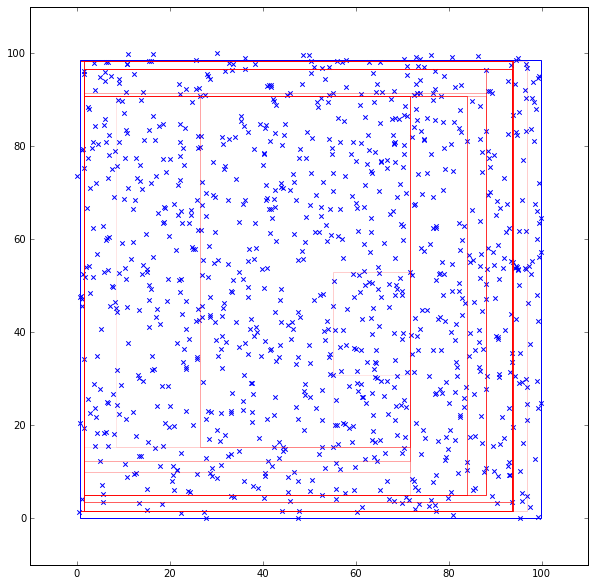

In [5]:
fig = plt.figure(figsize=(10,10), dpi=300)
ax = fig.add_subplot(111, aspect='equal')
plt.scatter([s[0] for s in samples], [s[1] for s in samples], marker='x')
plt.xlim(xmin=-10, xmax = 110)
plt.ylim(ymin=-10, ymax= 110)
for h in hypothesis[:100]:
    ax.add_patch(patches.Rectangle((h[0], h[2]), h[1]-h[0],h[3]-h[2], fill=False, ec='r', alpha=0.1))

    
c = hypothesis[-1]
ax.add_patch(patches.Rectangle((c[0], c[2]), c[1]-c[0],c[3]-c[2], fill=False, ec='b'))

plt.savefig('rect_1.png')
plt.show()

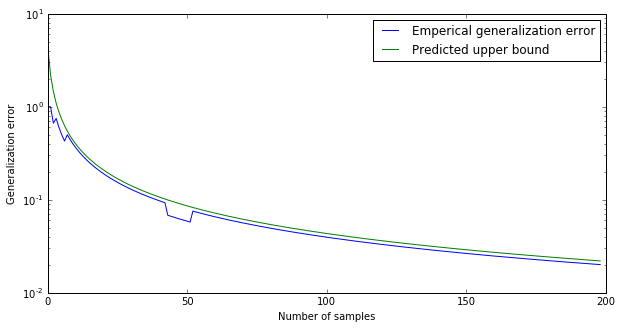

In [6]:
plt.figure(figsize=(10,5), dpi=300)
plt.semilogy()
plt.plot([1-c for c in correct])
plt.plot(predict)
plt.xlabel('Number of samples')
plt.ylabel('Generalization error')
plt.legend(['Emperical generalization error', 'Predicted upper bound'])

plt.savefig('predict_vs_practical.png')
plt.show()

In [231]:
predict

[4.3820266346738812,
 2.1910133173369406,
 1.4606755448912936,
 1.0955066586684703,
 0.87640532693477624,
 0.73033777244564679,
 0.62600380495341157,
 0.54775332933423515,
 0.48689184829709786,
 0.43820266346738812,
 0.39836605769762556,
 0.3651688862228234,
 0.33707897189799085,
 0.31300190247670578,
 0.29213510897825873,
 0.27387666466711758,
 0.25776627262787538,
 0.24344592414854893,
 0.23063298077230954,
 0.21910133173369406,
 0.20866793498447053,
 0.19918302884881278,
 0.19052289715973397,
 0.1825844431114117,
 0.17528106538695526,
 0.16853948594899543,
 0.1622972827656993,
 0.15650095123835289,
 0.15110436671289246,
 0.14606755448912936,
 0.14135569789270583,
 0.13693833233355879,
 0.13278868589920853,
 0.12888313631393769,
 0.12520076099068231,
 0.12172296207427447,
 0.11843315228848328,
 0.11531649038615477,
 0.11235965729933028,
 0.10955066586684703,
 0.10687869840668003,
 0.10433396749223527,
 0.10190759615520655,
 0.099591514424406391,
 0.097378369659419581,
 0.095261448579